Importing Libraries


In [572]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Displaying Data

In [573]:
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Information about data. For eg : number of rows , their data types , etc

In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Statistical information about data

In [575]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Droping unecessary features
Like we dont need Name , Ticket or Id this will not decide wether person will survived or not

In [576]:
drop = ["PassengerId", "Name", "Ticket", "Cabin"]
df.drop(drop, axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Checking missing data in dataset

In [577]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


Here we se that we have 177 null values in 'Age' feature , so we will fill null values with median of age

In [578]:
df['Age'] = df['Age'].fillna(df['Age'].median())

We have 2 null values in 'Embarked' feature since the count is very less therefore we will drop it .

In [579]:
df['Embarked']=df['Embarked'].dropna(inplace=True)

checking the categories in Embarked

In [580]:
df['Embarked'].unique()

array([None], dtype=object)

Checking categories in Sex

In [581]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

Now we will encode the categorical features such as sex and embarked

In [582]:
from sklearn.preprocessing import LabelEncoder
encode = ["Sex", "Embarked"]
le = LabelEncoder()
for col in encode:
  df[col] = le.fit_transform(df[col])

In [583]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


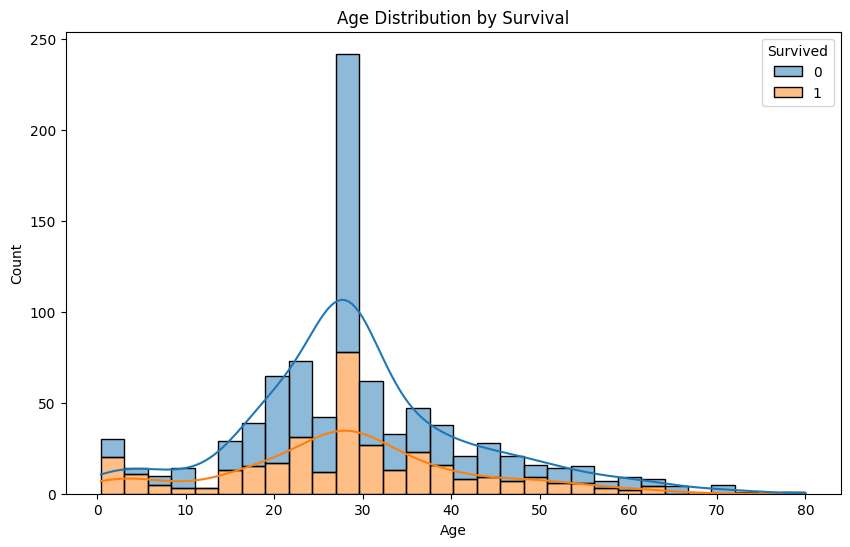

In [584]:
fig = plt.subplots(figsize=(10,6))
sns.histplot(df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title("Age Distribution by Survival")
plt.show()

We se that the most people who Survived is between Age 20 to 40

Now we will Scale the Age and Fare feature for maintaining the range of the whole dataset

In [585]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

<Axes: >

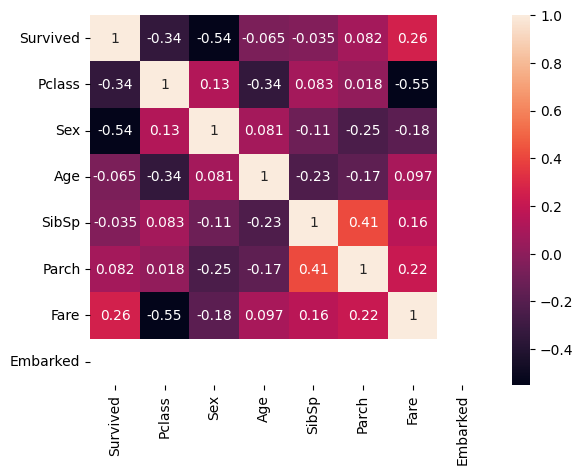

In [586]:
sns.heatmap(df.corr(), annot=True)

Through Heatmap we Observe that Fare has Slight positive correlation and Sex , Pclass has Strong negative correlation. This conclude that Sex, Fare, Pclass are the most informative features regarding survival.
Age, SibSp, Parch have weak correlations with survival alone, but may still be useful in interaction with other features.

Using XG Boost Classifier Model

In [587]:
from xgboost import XGBClassifier
X = df.iloc[: , 1:]
Y = df['Survived']

Splitting the Data

In [588]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Fitting the data

In [589]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Checking Acuracy

In [590]:
accuracy = XGB.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168
